As the launch of next generation gaming console around the corner, I think that it is nice to have an overview on the entire gaming market. I also want to have a deep analysis on how well the current generation consoles are doing, namely PS4 vs Xbox One.

This project is for gamers who are interested in gaming on the more popular platform and for developers who want to continue putting resources on current generation consoles. This analysis will offer insights on which platform has stronger player base and which platform sells more copies of games, as well as what kind of impact the current generation consoles could possibly have on the next generation consoles.

#### Part 1: Analysis of gaming market in general

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import sklearn
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.utils import column_or_1d
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df1=pd.read_csv('https://raw.githubusercontent.com/dxljack/Gaming-Market-Exploration/master/Dataset/Hardware%20Yearly%20Sales.csv')

In [3]:
df1

,Year,PS4,XOne,NS
0,2013,4430139,3075770,0
1,2014,14560282,7908581,0
2,2015,17510227,8631257,0
3,2016,17590843,8368621,0
4,2017,19808528,7644053,13116268
5,2018,18277267,6829443,16339594


In [4]:
df2=pd.read_csv('https://raw.githubusercontent.com/dxljack/Gaming-Market-Exploration/master/Dataset/Hardware%20Total%20Sales.csv')

In [5]:
df2

,Year,PS4,XOne,NS
0,2013,4430139,3075770,0
1,2014,19045310,10984351,0
2,2015,36667145,19640765,0
3,2016,53490988,27924386,0
4,2017,73528627,34306680,13116268
5,2018,91805894,41136123,29455862


In [6]:
df3=pd.read_csv('https://raw.githubusercontent.com/dxljack/Gaming-Market-Exploration/master/Dataset/vgsales-12-4-2019-short.csv')

Because we really only care about Global_Sales, I will replace missing value in Global_Sales with Total_Shipped. Next, I will also replace missing values in Critic_Score with User_Score.

In [7]:
df3["Global_Sales"] = df3["Global_Sales"].fillna(df3["Total_Shipped"])

In [8]:
df3["Critic_Score"] = df3["Critic_Score"].fillna(df3["User_Score"])

In [9]:
# fill in missing values in Global_Sales with mean value of each genre.
df3['Global_Sales'] = df3['Global_Sales'].fillna(df3.groupby('Genre')['Global_Sales'].transform('mean'))

In [10]:
# fill in missing values in Critic_Score with mean value of each genre.
df3['Critic_Score'] = df3['Critic_Score'].fillna(df3.groupby('Genre')['Critic_Score'].transform('mean'))

In [11]:
# round numerical values to 2 decimal places
df3 = df3.round(2)

In [12]:
df3.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.70,NaN,82.86,82.86,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.00,NaN,40.24,40.24,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.20,9.1,37.14,37.14,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,7.28,NaN,36.60,36.60,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.00,8.8,33.09,33.09,NaN,NaN,NaN,NaN,2009.0


In [13]:
df3.isnull().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score         0
User_Score       55457
Total_Shipped    53965
Global_Sales         0
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

In [14]:
df3.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
count,55792.000000,55792.000000,335.000000,1827.000000,55792.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000
mean,27896.500000,7.175042,8.253433,1.887258,0.484119,0.275541,0.155263,0.110402,0.044719,2005.659095
std,16105.907446,0.562451,1.401489,4.195693,0.953450,0.512809,0.399257,0.184673,0.129554,8.355585
min,1.000000,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
25%,13948.750000,6.880000,7.800000,0.200000,0.250000,0.050000,0.010000,0.020000,0.000000,2000.000000
50%,27896.500000,7.280000,8.500000,0.590000,0.370000,0.120000,0.040000,0.050000,0.010000,2008.000000
75%,41844.250000,7.360000,9.100000,1.800000,0.550000,0.290000,0.140000,0.120000,0.040000,2011.000000
max,55792.000000,10.000000,10.000000,82.860000,82.860000,9.760000,9.850000,2.690000,3.120000,2020.000000


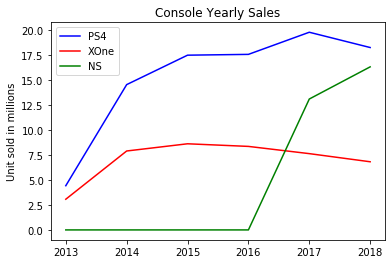

In [15]:
plt.plot(df1["Year"], df1["PS4"]/1000000, color='blue', label='PS4')
plt.plot(df1["Year"], df1["XOne"]/1000000, color='red', label='XOne')
plt.plot(df1["Year"], df1["NS"]/1000000, color='green', label='NS')
plt.ylabel("Unit sold in millions")
plt.title('Console Yearly Sales')
plt.xticks(df1['Year'])
plt.legend(loc='best')
plt.show()

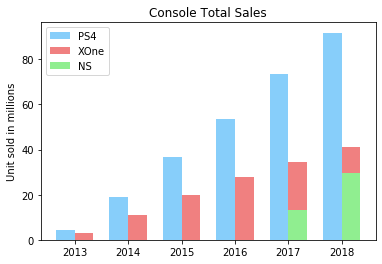

In [16]:
plt.bar(df2["Year"], df2["PS4"]/1000000, 0.35, label="PS4", color='lightskyblue')
plt.bar(df2["Year"]+0.35, df2["XOne"]/1000000, 0.35, label="XOne", color='lightcoral')
plt.bar(df2["Year"]+0.35, df2["NS"]/1000000, 0.35, label="NS", color='lightgreen')
plt.ylabel("Unit sold in millions")
plt.title('Console Total Sales')
plt.xticks(df2['Year']+0.35/2, ('2013','2014','2015','2016','2017','2018'))
plt.legend(loc='best')
plt.show()

From early graphs, we can see that in term of sales, PS4 is in the lead compared to XOne and NS.
Next, let us take a good of software in term of game sales, perhaps XOne will take the lead in this round.
Here, NS falls behind is because that it was launched 4 years later.

In [17]:
mask = (df3["Year"] >= 2013) & (df3["Year"] <= 2018)
df31=df3.loc[mask]
df31.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,7.28,NaN,36.60,36.60,NaN,NaN,NaN,NaN,2017.0
19,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.40,NaN,NaN,20.32,6.37,9.85,0.99,3.12,2013.0
20,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.70,NaN,NaN,19.39,6.06,9.71,0.60,3.02,2014.0
28,29,Pokemon X/Y,Role-Playing,E,3DS,Nintendo,Game Freak,8.90,9.7,16.37,16.37,NaN,NaN,NaN,NaN,2013.0
31,32,Pokemon Sun/Moon,Role-Playing,E,3DS,Nintendo,Game Freak,9.00,NaN,16.14,16.14,NaN,NaN,NaN,NaN,2016.0


In [18]:
mask1 = (df31["Platform"] == 'PS4') | (df31["Platform"] == 'XOne') | (df31["Platform"] == 'NS')
df_3 = df31.loc[mask1]

In [19]:
df_3.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
20,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.70,NaN,NaN,19.39,6.06,9.71,0.60,3.02,2014.0
34,35,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,Treyarch,7.28,NaN,NaN,15.09,6.18,6.05,0.41,2.44,2015.0
35,36,Mario Kart 8 Deluxe,Racing,E,NS,Nintendo,Nintendo EPD,9.30,NaN,15.02,15.02,NaN,NaN,NaN,NaN,2017.0
45,46,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,Rockstar Games,9.80,NaN,NaN,13.94,5.26,6.21,0.21,2.26,2018.0
48,49,Super Mario Odyssey,Platform,E10,NS,Nintendo,Nintendo EPD,9.90,NaN,13.76,13.76,NaN,NaN,NaN,NaN,2017.0


Extract the columns we need for further exploration.

In [20]:
df_3=df_3[["Name", "Genre", "Platform", "Publisher", "Global_Sales", "Year"]]

In [21]:
df_3

,Name,Genre,Platform,Publisher,Global_Sales,Year
20,Grand Theft Auto V,Action,PS4,Rockstar Games,19.39,2014.0
34,Call of Duty: Black Ops 3,Shooter,PS4,Activision,15.09,2015.0
35,Mario Kart 8 Deluxe,Racing,NS,Nintendo,15.02,2017.0
45,Red Dead Redemption 2,Action-Adventure,PS4,Rockstar Games,13.94,2018.0
48,Super Mario Odyssey,Platform,NS,Nintendo,13.76,2017.0
...,...,...,...,...,...,...
55759,Yooka-Laylee,Platform,NS,Team17 Digital Ltd,0.85,2017.0
55772,ZERO GUNNER 2,Action,NS,Zerodiv,0.47,2018.0
55775,ZOMBIE GOLD RUSH,Action,NS,Amazing Inc.,0.47,2017.0
55776,Zombillie,Puzzle,NS,Forever Entertainment S.A.,0.30,2018.0


In [22]:
df_3.isnull().sum()

Name            0
Genre           0
Platform        0
Publisher       0
Global_Sales    0
Year            0
dtype: int64

Let us group the remaining data by Platform and compute the sum of sales.

In [23]:
df_31=df_3[["Platform", "Global_Sales"]].groupby("Platform").sum()

In [24]:
df_31.head()

,Global_Sales
Platform,
NS,428.42
PS4,895.09
XOne,467.08


Above is the Global_Sales from 2013 to 2018.

[Text(0, 0.5, 'Global sales in millions'), Text(0.5, 0, 'Platform')]

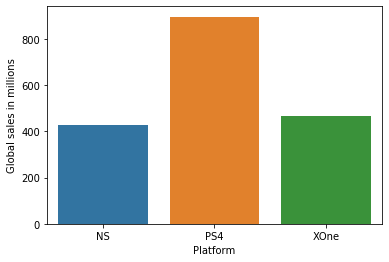

In [25]:
ax = sns.barplot(df_31.index, df_31["Global_Sales"])
ax.set(xlabel='Platform', ylabel='Global sales in millions')

If you would like to see the yearly breakdown, here it is.

In [26]:
df_32=df_3.groupby(["Platform", "Year"])["Global_Sales"].sum()

In [27]:
df_32=df_32.to_frame()
df_32

Global_Sales
Platform Year                
NS       2017.0        213.12
         2018.0        215.30
PS4      2013.0         35.09
         2014.0        138.08
         2015.0        180.31
         2016.0        180.08
         2017.0        201.39
         2018.0        160.14
XOne     2013.0         26.23
         2014.0         75.44
         2015.0         96.90
         2016.0         85.76
         2017.0         95.56
         2018.0         87.19

Text(0, 0.5, 'Global sales in millions')

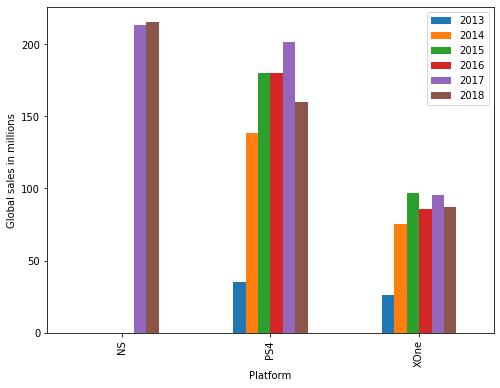

In [28]:
ax1 = df_32.unstack().plot(figsize=(8,6), kind='bar')
ax1.legend(["2013","2014","2015","2016","2017","2018"])
ax1.set_ylabel("Global sales in millions")

At this point, we can see that XOne isn't really doing all the well for this generation. It falls behind PS4 every year. Now let us take a look at the exact market share in term of game sales. Note that we cannot explore the market share with PC, since we didnot take into account the PC sales.

In [29]:
df_33=df_31/df_31["Global_Sales"].sum()
df_33

,Global_Sales
Platform,
NS,0.239262
PS4,0.499886
XOne,0.260853


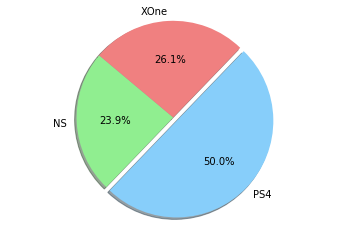

In [30]:
labels = 'NS', 'PS4', 'XOne'
sizes = df_33["Global_Sales"]
colors = ['lightgreen', 'lightskyblue', 'lightcoral']
explode = (0, 0.05, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax2 = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In summary, as far as current generation console goes, the winner is clearly the PS4. This will give a lot of confidence to the developers who will continue to make games for PS4 as time goes on, because even when the next generation launches, PS4 will still be supported many years to come. In addition, this will possibly promotes the sales of PS5 since the player base is high, it is very likely for those players to stay with PlayStation due to few main factors, including previous investments in games and friends in the same network, etc. This concludes the analysis on gaming market.

#### Part 2: Modeling and prediction on future game sales

We can start by finding what kind of game is most popular through the year. For simplicity, we will continue using df_3 which consists of games from 2013 to 2018.

In [31]:
df3.groupby('Genre')['Critic_Score'].mean()

Genre
Action              6.850457
Action-Adventure    7.700000
Adventure           7.359724
Board Game          5.300000
Education           7.500000
Fighting            7.389324
MMO                 7.880270
Misc                6.880158
Music               7.910256
Party               6.050667
Platform            7.329437
Puzzle              7.240032
Racing              7.099340
Role-Playing        7.469725
Sandbox             9.200000
Shooter             7.280148
Simulation          6.939591
Sports              7.290423
Strategy            7.419786
Visual Novel        8.500000
Name: Critic_Score, dtype: float64

In [32]:
df3.isnull().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score         0
User_Score       55457
Total_Shipped    53965
Global_Sales         0
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

In [33]:
df_model = df3[["Name", "Platform", "Genre", "Publisher", "Critic_Score", "Global_Sales", "Year"]]

In [34]:
df_model.head()

,Name,Platform,Genre,Publisher,Critic_Score,Global_Sales,Year
0,Wii Sports,Wii,Sports,Nintendo,7.70,82.86,2006.0
1,Super Mario Bros.,NES,Platform,Nintendo,10.00,40.24,1985.0
2,Mario Kart Wii,Wii,Racing,Nintendo,8.20,37.14,2008.0
3,PlayerUnknown's Battlegrounds,PC,Shooter,PUBG Corporation,7.28,36.60,2017.0
4,Wii Sports Resort,Wii,Sports,Nintendo,8.00,33.09,2009.0


In [35]:
df_model.isnull().sum()

Name              0
Platform          0
Genre             0
Publisher         0
Critic_Score      0
Global_Sales      0
Year            979
dtype: int64

In [36]:
top5_genre=df_model.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5)
top5_genre

Genre
Shooter     3710.91
Action      3619.11
Misc        3516.49
Platform    2933.69
Sports      2878.70
Name: Global_Sales, dtype: float64

In [37]:
top5_genre=top5_genre.to_frame()
top5_genre_df = df_model[df_model["Genre"].isin(top5_genre.index)]
top5_genre_df.head()

,Name,Platform,Genre,Publisher,Critic_Score,Global_Sales,Year
0,Wii Sports,Wii,Sports,Nintendo,7.70,82.86,2006.0
1,Super Mario Bros.,NES,Platform,Nintendo,10.00,40.24,1985.0
3,PlayerUnknown's Battlegrounds,PC,Shooter,PUBG Corporation,7.28,36.60,2017.0
4,Wii Sports Resort,Wii,Sports,Nintendo,8.00,33.09,2009.0
6,New Super Mario Bros.,DS,Platform,Nintendo,9.10,30.80,2006.0


In [38]:
top20_name=df_model.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False).head(20)
top20_name

Name
Wii Sports                            82.86
Grand Theft Auto V                    76.89
Minecraft                             67.76
Super Mario Bros.                     41.83
PlayerUnknown's Battlegrounds         39.10
Mario Kart Wii                        37.14
Tetris                                36.44
Wii Sports Resort                     33.09
Call of Duty: Black Ops               32.61
Pokemon Red / Green / Blue Version    31.38
New Super Mario Bros.                 30.80
Call of Duty: Modern Warfare 3        30.71
New Super Mario Bros. Wii             30.22
Call of Duty: Black Ops II            29.59
Call of Duty: Ghosts                  28.80
Duck Hunt                             28.31
Wii Play                              28.02
Call of Duty: Black Ops 3             26.72
Call of Duty: Modern Warfare 2        26.64
Mario Kart DS                         24.14
Name: Global_Sales, dtype: float64

In [39]:
top20_name=top20_name.to_frame()
top20_name.head()

,Global_Sales
Name,
Wii Sports,82.86
Grand Theft Auto V,76.89
Minecraft,67.76
Super Mario Bros.,41.83
PlayerUnknown's Battlegrounds,39.10


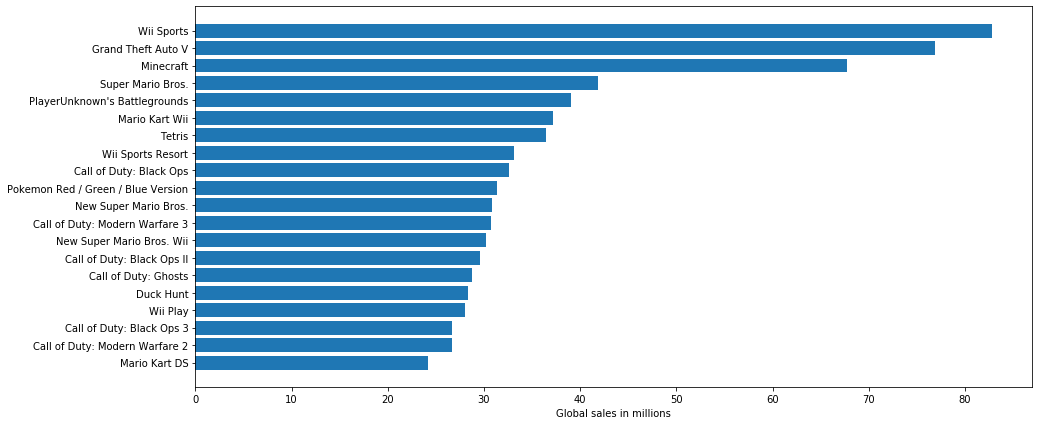

In [40]:
fig, ax2 = plt.subplots(figsize=(15,7))
plt.barh(top20_name.index, top20_name["Global_Sales"], align='center')
plt.xlabel('Global sales in millions')
ax2.invert_yaxis()
plt.show()

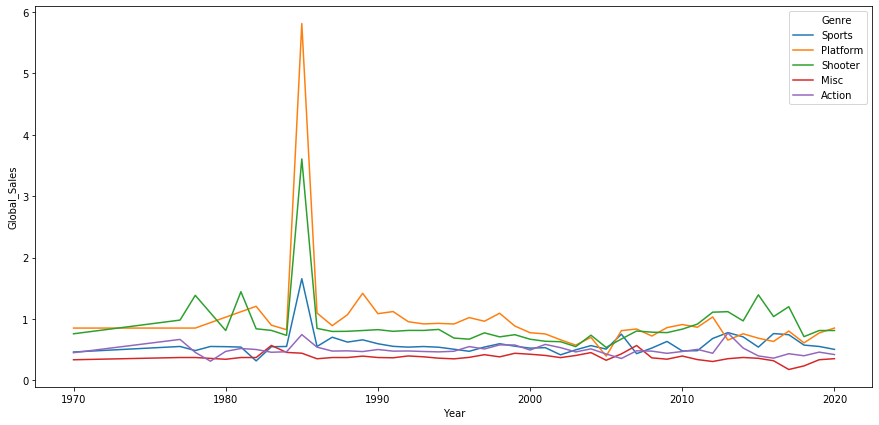

In [41]:
fig, ax3 = plt.subplots(figsize=(15,7))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax3)

In [42]:
top5_publisher=df_model.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(5)
top5_publisher

Publisher
Nintendo           2255.49
Unknown            2147.92
Sega               1053.68
Electronic Arts    1000.68
Activision          977.37
Name: Global_Sales, dtype: float64

In [43]:
top5_publisher=top5_publisher.to_frame()
top5_publisher_df = df_model[df_model["Publisher"].isin(top5_publisher.index)]
top5_publisher_df.head()

,Name,Platform,Genre,Publisher,Critic_Score,Global_Sales,Year
0,Wii Sports,Wii,Sports,Nintendo,7.7,82.86,2006.0
1,Super Mario Bros.,NES,Platform,Nintendo,10.0,40.24,1985.0
2,Mario Kart Wii,Wii,Racing,Nintendo,8.2,37.14,2008.0
4,Wii Sports Resort,Wii,Sports,Nintendo,8.0,33.09,2009.0
5,Pokemon Red / Green / Blue Version,GB,Role-Playing,Nintendo,9.4,31.38,1998.0


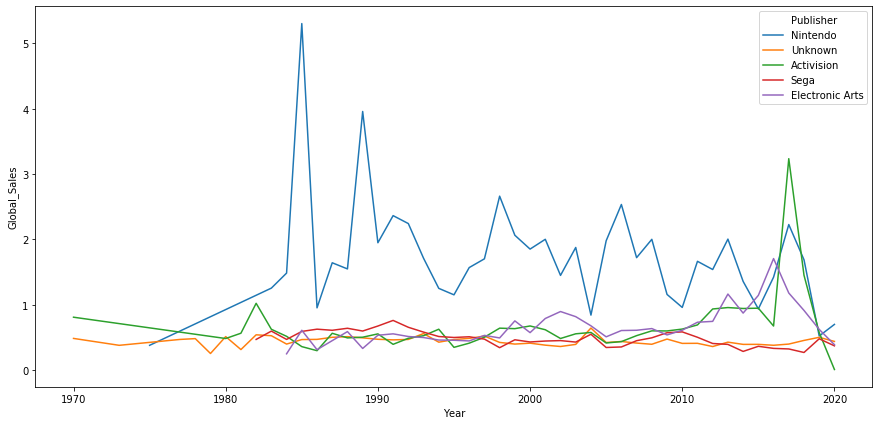

In [44]:
fig, ax4 = plt.subplots(figsize=(15,7))
sns.lineplot(x='Year', y='Global_Sales', hue='Publisher', data=top5_publisher_df, ci=None, ax=ax4)

Now that we know what kind of games are popular, we can proceed building a linear model to predict sales with selected features, namely Genre and Publisher.

In [45]:
df_model = df_model[["Platform", "Genre", "Publisher", "Critic_Score", "Global_Sales"]]
df_model.head()

,Platform,Genre,Publisher,Critic_Score,Global_Sales
0,Wii,Sports,Nintendo,7.70,82.86
1,NES,Platform,Nintendo,10.00,40.24
2,Wii,Racing,Nintendo,8.20,37.14
3,PC,Shooter,PUBG Corporation,7.28,36.60
4,Wii,Sports,Nintendo,8.00,33.09


In [46]:
df_model.describe()

,Critic_Score,Global_Sales
count,55792.000000,55792.000000
mean,7.175042,0.484119
std,0.562451,0.953450
min,1.000000,0.000000
25%,6.880000,0.250000
50%,7.280000,0.370000
75%,7.360000,0.550000
max,10.000000,82.860000


In [47]:
X = df_model[['Platform', 'Genre', 'Publisher', 'Critic_Score']]
y = df_model['Global_Sales']

In [48]:
categorical_columns = ['Platform', 'Genre', 'Publisher']
numerical_columns = ['Critic_Score']

In [49]:
features = ColumnTransformer([('categorical', OneHotEncoder(), categorical_columns),
                              ('numerical', StandardScaler(), numerical_columns)])

In [50]:
# Main model for interactive webapp
# Linear regression without cross-validation
lr = LinearRegression()
pipe_lr = Pipeline([
    ('features', features),
    ('estimator', lr)
])

pipe_lr.fit(X, y)
y_pred_lr = pipe_lr.predict(X)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_lr))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y, y_pred_lr))

Mean squared error: 0.76
R2 Score: 0.17


In [51]:
# Next let's try Ridge regression without cross-validation
ridge = Ridge()
pipe_ridge = Pipeline([
    ('features', features),
    ('estimator', ridge)
])

pipe_ridge.fit(X, y)
y_pred_ridge = pipe_ridge.predict(X)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_ridge))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y, y_pred_ridge))

Mean squared error: 0.76
R2 Score: 0.16


In [52]:
# Ridge regression with cross-validation
X_new = features.fit_transform(X,y)
gs_ridge = GridSearchCV(
                ridge,
                {"alpha": np.arange(0, 15, 0.1)},  # range of hyperparameters to test
                cv=10,  # 10-fold cross validation
                n_jobs=2,  # run each hyperparameter in one of two parallel jobs
)
gs_ridge.fit(X_new, y)
y_pred_ridge_gs = gs_ridge.predict(X_new)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_ridge_gs))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y, y_pred_ridge_gs))

Mean squared error: 0.78
R2 Score: 0.14


In [53]:
gs_ridge.best_params_

{'alpha': 14.9}

In [54]:
y_pred_ridge_gs

array([1.96617484, 2.93567924, 2.20294519, ..., 0.36194798, 0.25543577,
       0.75253794])

In [55]:
# RandomForest regression without cross-validation
rf = RandomForestRegressor()
pipe_rf = Pipeline([
    ('features', features),
    ('estimator', rf)
])

pipe_rf.fit(X, y)
y_pred_rf = pipe_rf.predict(X)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_rf))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y, y_pred_rf))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean squared error: 0.28
R2 Score: 0.69


In [56]:
# Testing model prediction by user input
data = pd.DataFrame([('PS4', 'Shooter', 'Activision', 8.0)], columns = ['Platform' , 'Genre', 'Publisher' , 'Critic_Score'])

In [57]:
data

,Platform,Genre,Publisher,Critic_Score
0,PS4,Shooter,Activision,8.0


In [58]:
# Save predictive_model
pickle.dump(pipe_rf, open('predictive_model.sav', 'wb'))

In [59]:
pipe_rf = pickle.load(open('predictive_model.sav', 'rb'))

In [60]:
# Results in millions
str(pipe_rf.predict(data).tolist()[0])

'12.477000000000002'

In [61]:
str(round(pipe_rf.predict(data).tolist()[0], 2))

'12.48'

In [62]:
# RandomForest regression with cross-validation
X_new = features.fit_transform(X,y)
gs_rf = GridSearchCV(
                rf,
                {"max_depth": [50,60,70,80,90]},  # range of hyperparameters to test
                cv=10,  # 10-fold cross validation
                n_jobs=2,  # run each hyperparameter in one of two parallel jobs
)
gs_rf.fit(X_new, y)
y_pred_rf_gs = gs_rf.predict(X_new)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_rf_gs))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y, y_pred_rf_gs))

Mean squared error: 0.27
R2 Score: 0.70


In [63]:
gs_rf.best_params_

{'max_depth': 70}

In [64]:
# Save best_predictive_model
pickle.dump(gs_rf, open('best_predictive_model.sav', 'wb'))

In [65]:
gs_rf = pickle.load(open('best_predictive_model.sav', 'rb'))

From LinearRegression, RidgeRegression to RandomForestRegressor, there is a noticeable improvement in model performance. Since the results from RandomForestRegressor with or without cross-validation are the same, I will simply use the former as my predictive model. Some additional thoughts, instead of using OneHotEncoding, What if I use Label Encoding with respect to certain hiearchy.

In [66]:
# df_platform = df_model.groupby(['Platform'])['Global_Sales'].sum().sort_values().index

In [67]:
# df_genre = df_model.groupby(['Genre'])['Global_Sales'].sum().sort_values().index

In [68]:
# df_publisher = df_model.groupby(['Publisher'])['Global_Sales'].sum().sort_values().index

In [69]:
# # LabelEncoding with respect to chosen order
# class LabelEncoder(LabelEncoder):

#     def fit(self, y):
#         y = column_or_1d(y, warn=True)
#         self.classes_ = pd.Series(y).unique()
#         return self

In [70]:
# le = LabelEncoder()

In [71]:
# le_platform = le.fit(df_platform)
# le_platform.classes_

In [72]:
# c1 = le_platform.transform(df_model['Platform'])
# df_model_new = pd.DataFrame()
# df_model_new['Platform'] = c1

In [73]:
# le_genre = le.fit(df_genre)
# le_genre.classes_

In [74]:
# c2 = le_genre.transform(df_model['Genre'])
# df_model_new['Genre'] = c2

In [75]:
# le_publisher = le.fit(df_publisher)
# le_publisher.classes_

In [76]:
# c3 = le_publisher.transform(df_model['Publisher'])
# df_model_new['Publisher'] = c3

In [77]:
# df_model_new['Critic_Score'] = df_model['Critic_Score']
# df_model_new['Global_Sales'] = df_model['Global_Sales']

In [78]:
# # This is the final dataframe for modeling
# df_model_new.head()

In [79]:
# X_model = df_model_new.loc[:, : 'Critic_Score']
# X_model = StandardScaler().fit_transform(X_model)

In [80]:
# X_model

In [81]:
# y_model = df_model_new['Global_Sales']

In [82]:
# y_model.head()

In [83]:
# # New Linear regression without train-test-split and cross-validation
# lr_est = LinearRegression()
# lr_est.fit(X_model, y_model)
# y_pred_lr_new = lr_est.predict(X_model)
# # The mean squared error
# print('Mean squared error: %.2f'
#       % mean_squared_error(y_model, y_pred_lr_new))
# # The r2 score
# print('R2 Score: %.2f'
#       % r2_score(y_model, y_pred_lr_new))

In [84]:
# X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.25, random_state=42)
# lr_est.fit(X_train, y_train)
# y_pred_lr_new_split = lr_est.predict(X_test)
# # The mean squared error
# print('Mean squared error: %.2f'
#       % mean_squared_error(y_test, y_pred_lr_new_split))
# # The r2 score
# print('R2 Score: %.2f'
#       % r2_score(y_test, y_pred_lr_new_split))

In [85]:
# # New Ridge regression with train-split-test and cross-validation
# gs_ridge_new = GridSearchCV(
#                 ridge,
#                 {"alpha": np.arange(0, 15, 0.1)},  # range of hyperparameters to test
#                 cv=10,  # 10-fold cross validation
#                 n_jobs=2,  # run each hyperparameter in one of two parallel jobs
# )
# gs_ridge_new.fit(X_train, y_train)
# y_pred_ridge_gs_new = gs_ridge_new.predict(X_test)
# # The mean squared error
# print('Mean squared error: %.2f'
#       % mean_squared_error(y_test, y_pred_ridge_gs_new))
# # The r2 score
# print('R2 Score: %.2f'
#       % r2_score(y_test, y_pred_ridge_gs_new))

In [86]:
# gs_ridge_new.best_params_

In summary, we have successfully predicted game global sales based on platform, genre, publisher and critic_score. As you can see above, the MSE is low as we would prefer. Ideally, top genre games and top publisher games will have bigger sales as well as popular platform games. I'm sure there is room for improvement in the model, this is yet to be explored. For now, this concludes the modeling and predicting.

#### Part 3. Building a gamne recommender system


Now that we are done with business analytics, let's build a game recommender system for us consumers.

In [87]:
# df4=pd.read_csv('https://raw.githubusercontent.com/dxljack/Gaming-Market-Exploration/master/Dataset/game%20descriptions.csv')

In [88]:
# df4 = df4[['name', 'desc_snippet']]

In [89]:
# df4['name'] = df4['name'].str.upper() 

In [90]:
# # remove all non-ASCII characters
# df4['name'] = df4['name'].str.encode('ascii', 'ignore').str.decode('ascii')

In [91]:
# df4.head()

In [92]:
# df4.info()

In [93]:
mask2 = (df3["Platform"] == 'PS4') | (df3["Platform"] == 'XOne') | (df3["Platform"] == 'NS') | (df3["Platform"] == 'PC')
df_rec = df3.loc[mask2]

In [94]:
df_rec = df_rec[['Name', 'Platform', 'Genre', 'Publisher', 'Critic_Score', 'Year']]

In [95]:
df_rec.isnull().sum()

Name              0
Platform          0
Genre             0
Publisher         0
Critic_Score      0
Year            663
dtype: int64

In [96]:
df_rec = df_rec.dropna(subset=['Year'])

In [97]:
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# import nltk

In [98]:
df_rec['Critic_Score'] = df_rec['Critic_Score'].astype(int)
df_rec['Year'] = df_rec['Year'].astype(int)

In [99]:
df_rec['Critic_Score'] = df_rec['Critic_Score'].astype(str)
df_rec['Year'] = df_rec['Year'].astype(str)

In [100]:
df_rec['Name'] = df_rec['Name'].str.upper() 

In [101]:
# Remove quotations in game names
df_rec['Name'] = df_rec['Name'].str.replace('"','')

In [102]:
df_rec['Joined Column'] = df_rec[['Name', 'Genre', 'Publisher']].apply(lambda x: ', '.join(x), axis = 1)

In [103]:
df_rec.head()

,Name,Platform,Genre,Publisher,Critic_Score,Year,Joined Column
3,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,Shooter,PUBG Corporation,7,2017,"PLAYERUNKNOWN'S BATTLEGROUNDS, Shooter, PUBG C..."
9,MINECRAFT,PC,Misc,Mojang,10,2010,"MINECRAFT, Misc, Mojang"
20,GRAND THEFT AUTO V,PS4,Action,Rockstar Games,9,2014,"GRAND THEFT AUTO V, Action, Rockstar Games"
22,GARRY'S MOD,PC,Misc,Unknown,6,2004,"GARRY'S MOD, Misc, Unknown"
34,CALL OF DUTY: BLACK OPS 3,PS4,Shooter,Activision,7,2015,"CALL OF DUTY: BLACK OPS 3, Shooter, Activision"


In [104]:
# Save df_rec
df_rec.to_pickle('recommender_dataframe') 

In [105]:
df_rec = pd.read_pickle('recommender_dataframe')

In [106]:
# cv = CountVectorizer()
# cv_matrix = cv.fit_transform(df_rec['Joined Column'])
# cv_name = cv.get_feature_names()
# cv_event = matrix.toarray()

In [107]:
# cosine_sim = cosine_similarity(cv_matrix, cv_matrix)
# cosine_sim

In [108]:
# Compute jaccard similarity
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [109]:
# Recommend top 5 games
def get_recommendation(name, platform):
    df_rec1 = df_rec[['Name', 'Platform', 'Joined Column']]
    df_rec_final = df_rec1[df_rec1['Platform'] == platform]
    df_rec_final = df_rec_final[['Name', 'Joined Column']]
    game_desc = df_rec_final.groupby('Name')['Joined Column'].apply(list).to_dict() # Convert dataframe to dictionary
    rec_dict = {}
    for k in game_desc.keys():
        rec_dict[k] = get_jaccard_sim(game_desc[name][0], game_desc[k][0])
    sort_dict = sorted(rec_dict.items(), key=lambda x: x[1], reverse=True)
    return [tuple[0] for tuple in sort_dict[1:6]]

In [110]:
type(get_recommendation('GRAND THEFT AUTO V', 'PC'))

list

In [111]:
rec = get_recommendation('GRAND THEFT AUTO V', 'PC')
str_rec = "\n".join(rec)

In [112]:
print(str_rec)

GRAND THEFT AUTO III
GRAND THEFT AUTO IV
GRAND THEFT AUTO 2
GRAND THEFT AUTO IV: THE COMPLETE EDITION
GRAND THEFT AUTO: LONDON 1969


In [113]:
# # combine rows with same game name and join strings
# df_rec['Platform'] = df_rec.groupby(['Name', 'Genre'])['Platform'].transform(lambda x : ', '.join(x))

In [114]:
# df_rec = df_rec.drop_duplicates('Name')

In [115]:
# df_4_rec = df_rec.merge(df4, how='outer', left_on='Name', right_on='name')

In [116]:
# df_4_rec = df_4_rec[['Name', 'Platform', 'Genre', 'Publisher', 'Critic_Score', 'Year', 'desc_snippet']]

In [117]:
# df_4_rec = df_4_rec.astype(str)

In [118]:
# df_4_rec = df_4_rec[df_4_rec['Name'] !='nan']
# df_4_rec = df_4_rec[df_4_rec['desc_snippet'] !='nan']

In [119]:
# df_4_rec.info()

In [120]:
# # convert Critic_Score and Year into string 
# # Combine columns into one using join
# df_4_rec['Joined Column'] = df_4_rec[['Platform', 'Genre', 'Publisher', 'Year', 'desc_snippet']].apply(lambda x: ', '.join(x), axis = 1)

In [121]:
# df_4_rec.head()

In [122]:
# df_4_rec.info()

In [123]:
# df_4_rec['Name']

In [124]:
# tfv = TfidfVectorizer()
# tfv_matrix = tfv.fit_transform(df_4_rec['Joined Column'])

In [125]:
# tfv_matrix.shape

In [126]:
# cosine_sim = cosine_similarity(tfv_matrix, tfv_matrix)

In [127]:
# cosine_sim.shape

In [128]:
# #Construct a reverse map of indices and game names
# indices = pd.Series(df_4_rec.index, index=df_4_rec['Name']).drop_duplicates()

In [129]:
# indices[:10]

In [130]:
# # Defining the function that takes in game name as input and returns the top 5 recommended games
# def get_recommendations(name, cosine_sim = cosine_sim):
    
#     # Get the index of the game that matches the name
#     idx = indices[name]

#     # Get the pairwsie similarity scores of all games with that game
#     sim_scores = list(enumerate(cosine_sim[idx]))

#     # Sort the games based on the similarity scores
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

#     # Get the scores of the 5 most similar games
#     sim_scores = sim_scores[1:11]

#     # Get the game indices
#     game_indices = [i[0] for i in sim_scores]

#     # Return the top 5 recommended games
#     return df_4_rec['Name'].iloc[game_indices]

In [131]:
# get_recommendations("CALL OF DUTY: WWII")